### Conditional trans

In [ ]:
phenotype <- 'both'
hla_gene <- 'B'
cond_round <- 1
using_groups <- FALSE
path_manova <- '/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/manova_results/main_manova_as_in_Ishigaki.tsv'

source('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_scripts/Conditional_haplotype_with_DRB1_DQA1_MMRM.r')

Warning message in stats::cor(x, y, use, method):
“the standard deviation is zero”


In [7]:
dt_dqa1

patient_id,allele,homo_hetero,Site_hla_AA
<chr>,<chr>,<int>,<chr>
H0,B*44:03,1,B_103_V
H0,B*51:01,1,B_103_V
H1,B*07:02,1,B_103_V
H1,B*50:01,1,B_103_L
H2,B*41:02,1,B_103_V
H2,B*51:01,1,B_103_V
H3,B*07:02,2,B_103_V
H4,B*57:01,2,B_103_V
H5,B*35:03,1,B_103_L


In [32]:
manova_cond_all$Site_hla <- sapply(manova_cond_all$condition, function(x) strsplit(x, split = '_')[[1]][8] %>% unname())

Warning message:
“Removed 1715 rows containing missing values or values outside the scale range (`geom_point()`).”


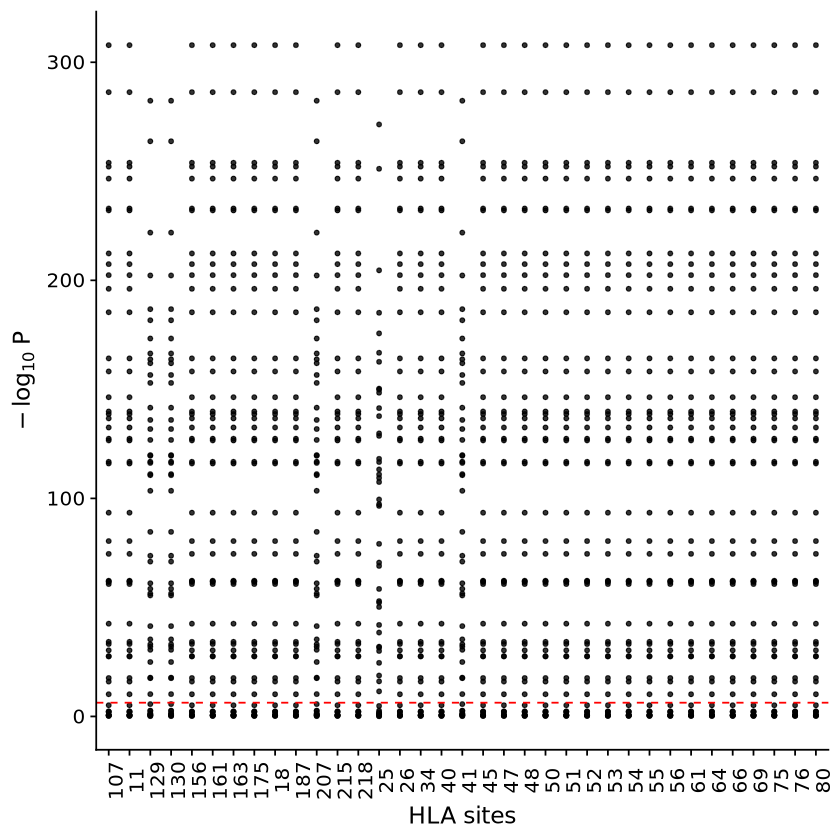

In [33]:
cond_hla_plot <- ggplot(manova_cond_all) +
    geom_point(aes(x = Site_hla, y = -log10(Pvalue)), alpha=0.8, size=1) +
    #geom_label(data = sig_sites_df, aes(x = Site_hla, y = -log10(Pvalue), label = Site_hla), hjust=0,vjust=0, show.legend = FALSE) + 
    scale_color_viridis_d() +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(0.01/20000), linetype="dashed", color = "red") +
    theme(legend.position = "none") +
    theme_cowplot() +
    #facet_wrap(~pair, ncol = 7) +
    theme(axis.text.x = element_text(angle = 90), strip.background = element_rect(fill = "white"))
cond_hla_plot